# Curve Fitting

I realized at this point that I needed the solver in Python to use the scipy cure fitting packages, so I just rewrote it to python from the c++ code for the newtonian orbit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
N = int(10**7)
t0 = 0; tf = 17;    
h = (tf-t0)/N;

x, y, z =  np.zeros(N), np.zeros(N), np.zeros(N)
vx, vy, vz = np.zeros(N), np.zeros(N), np.zeros(N)
a = np.zeros(N)

x[0] = -1901.5;
y[0] = -9;
z[0] = 0;
vz[0] = 0;
vy[0] = 106.3; 
vx[0] = 1; 

In [33]:
def k_newtonian(r_i, h, r):
    k1 = Newtonian(r)*r_i;
    k2 = Newtonian(r + k1*h/2)*r_i;
    k3 = Newtonian(r + k2*h/2)*r_i;
    k4 = Newtonian(r + k3*h)*r_i;
    return h*(k1+2*k2+2*k3+k4)/6;

def Newtonian(r):
    G = 4*np.pi**2
    M_BH = 4.15*10**6;               
    M_S = M_BH;
    c = 63198;
    return -G*M_S/(r*r*r);


In [34]:
def RK4_Newtonian(x, y, z, vx , vy, vz, N,h, a):
    G = 4*np.pi**2
    M_BH = 4.15*10**6;                 
    M_S = M_BH;
    c = 63198;


    r0 = np.sqrt(x[0]*x[0] + y[0]*y[0] + z[0]*z[0]);
    a[0] = Newtonian(r0);

    for i in range (1, N-1):
        r = np.sqrt(x[i-1]*x[i-1] + y[i-1]*y[i-1] + z[i-1]*z[i-1]);
        vx[i] = vx[i-1]+ k_newtonian(x[i-1], h, r);
        vy[i] = vy[i-1]+ k_newtonian(y[i-1], h, r);
        vz[i] = vz[i-1]+ k_newtonian(z[i-1], h, r);

        x[i] = x[i-1] +h*vx[i];
        y[i] = y[i-1] +h*vy[i];
        z[i] = z[i-1] + h*vz[i];
    
    return x, y, z

In [35]:
x_, y_, z_ = RK4_Newtonian(x, y, z, vx , vy, vz, N,h, a)

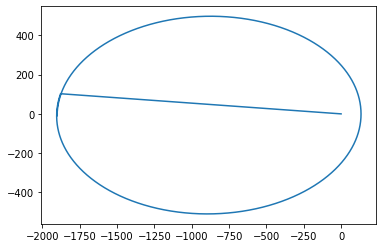

In [36]:
plt.plot(x_, y_)